# VERSIONS

In [1]:
#%reload_ext watermark
#%watermark

Last updated: 2021-05-10T13:29:06.927334+03:00

Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.13.0

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 4.15.0-142-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit



In [4]:
#%watermark --iversions

numpy     : 1.20.2
sys       : 3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
seaborn   : 0.11.1
matplotlib: 3.1.3
pandas    : 1.2.4



# LIBS

In [ ]:
# automatically uploaded from scripts/jupyter_startup_libs.py through ~/.ipython/profile_default/startup/

# DATA LOAD

# Train set

In [36]:
file_path_train ='train.csv'

#train_df = pd.read_csv(file_path_train)
train_df = sns.load_dataset('titanic')
target_col = 'survived'

display(train_df.info())
display(train_df.head())
train_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
827,1,2,male,1.0,0,2,37.0042,C,Second,child,False,NaN,Cherbourg,yes,False
246,0,3,female,25.0,0,0,7.7750,S,Third,woman,False,NaN,Southampton,no,True
292,0,2,male,36.0,0,0,12.8750,C,Second,man,True,D,Cherbourg,no,True
588,0,3,male,22.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
48,0,3,male,NaN,2,0,21.6792,C,Third,man,True,NaN,Cherbourg,no,False
488,0,3,male,30.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
74,1,3,male,32.0,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True
795,0,2,male,39.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
189,0,3,male,36.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
492,0,1,male,55.0,0,0,30.5000,S,First,man,True,C,Southampton,no,True


# Test set

In [ ]:
file_path_test ='test.csv'

test_df = pd.read_csv(file_path_test)

display(test_df.info())
display(test_df.head())
test_df.sample(10)

# Submit set

In [ ]:
file_path_submit ='sample_submission.csv'

df_submit = pd.read_csv(file_path_submit)

display(df_submit.info())
display(df_submit.head())
df_submit.sample(10)

# Missing values

In [26]:
import missingno as msno

tmp_df = train_df.iloc[:, :].copy(deep=True)

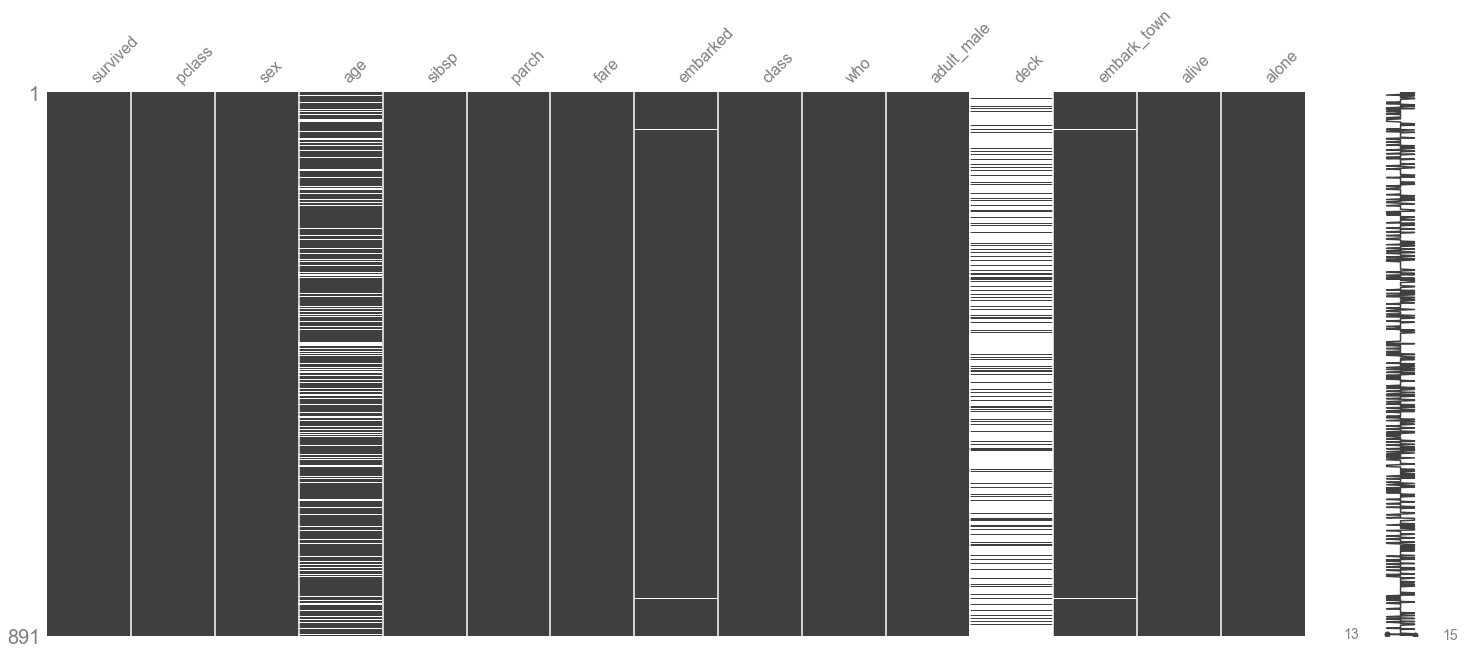

In [27]:
msno.matrix(tmp_df);

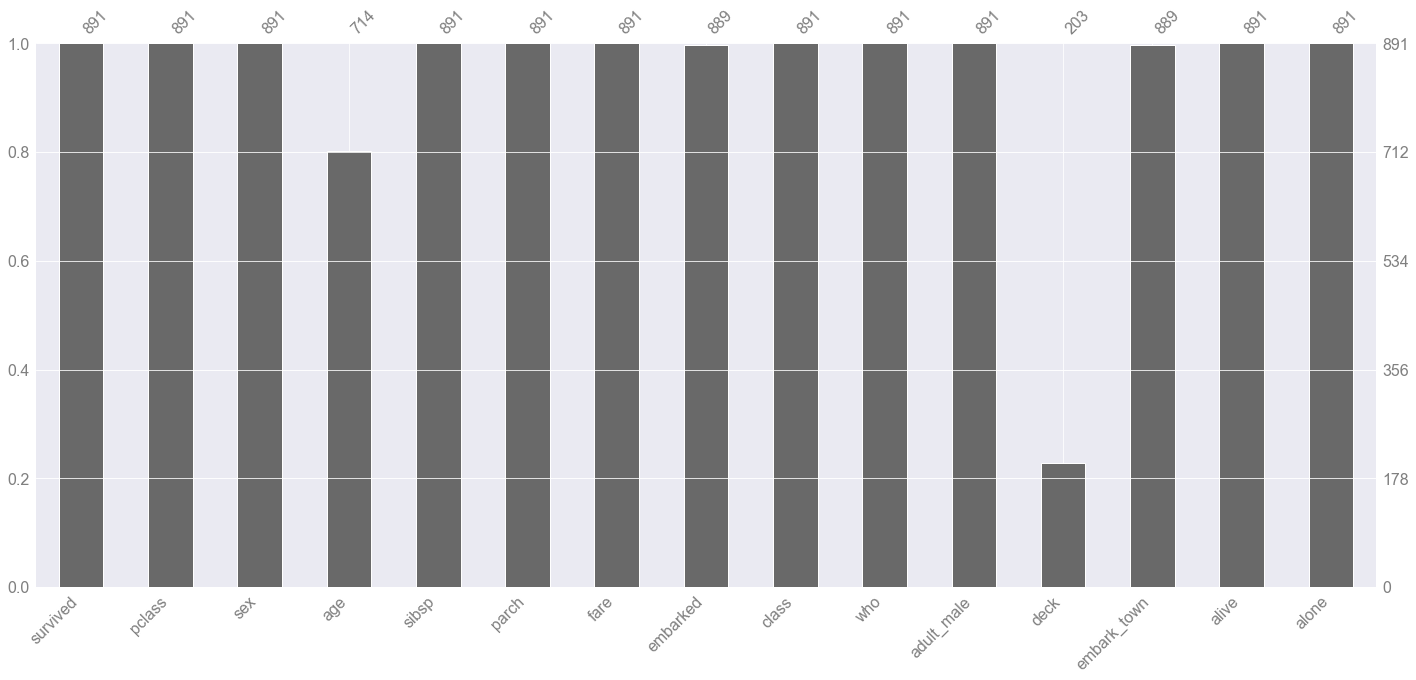

In [29]:
msno.bar(tmp_df);

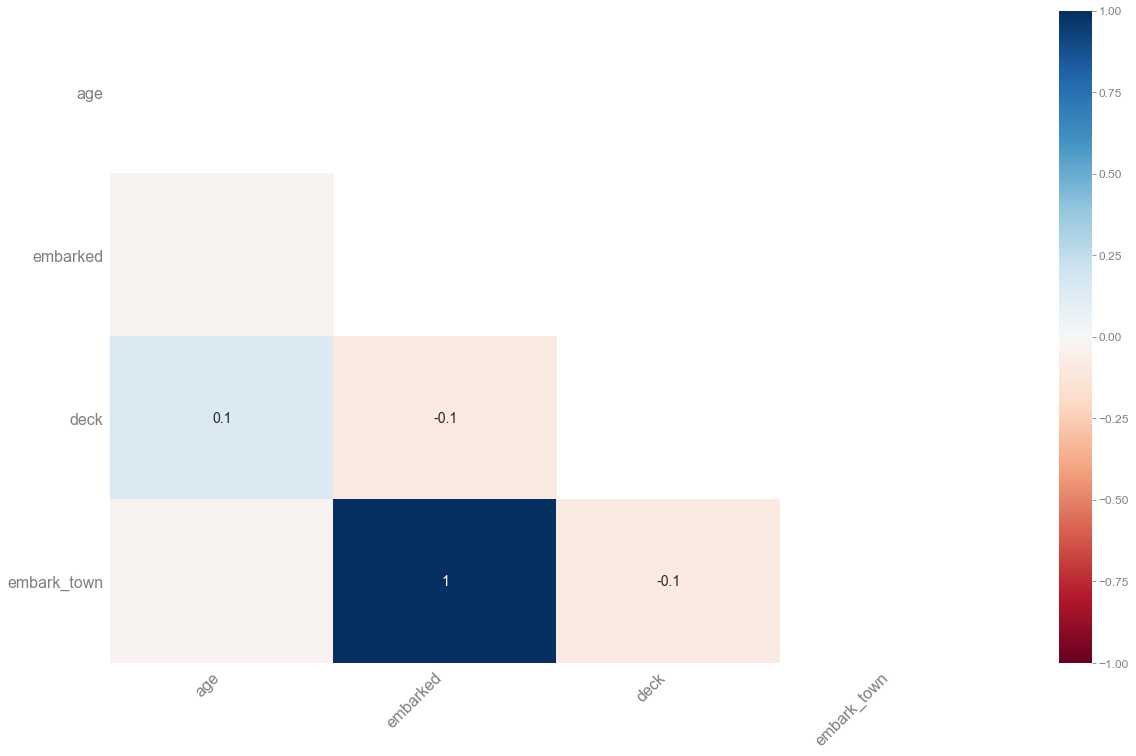

In [31]:
msno.heatmap(tmp_df);

# Exploratory Data Analysis (EDA)

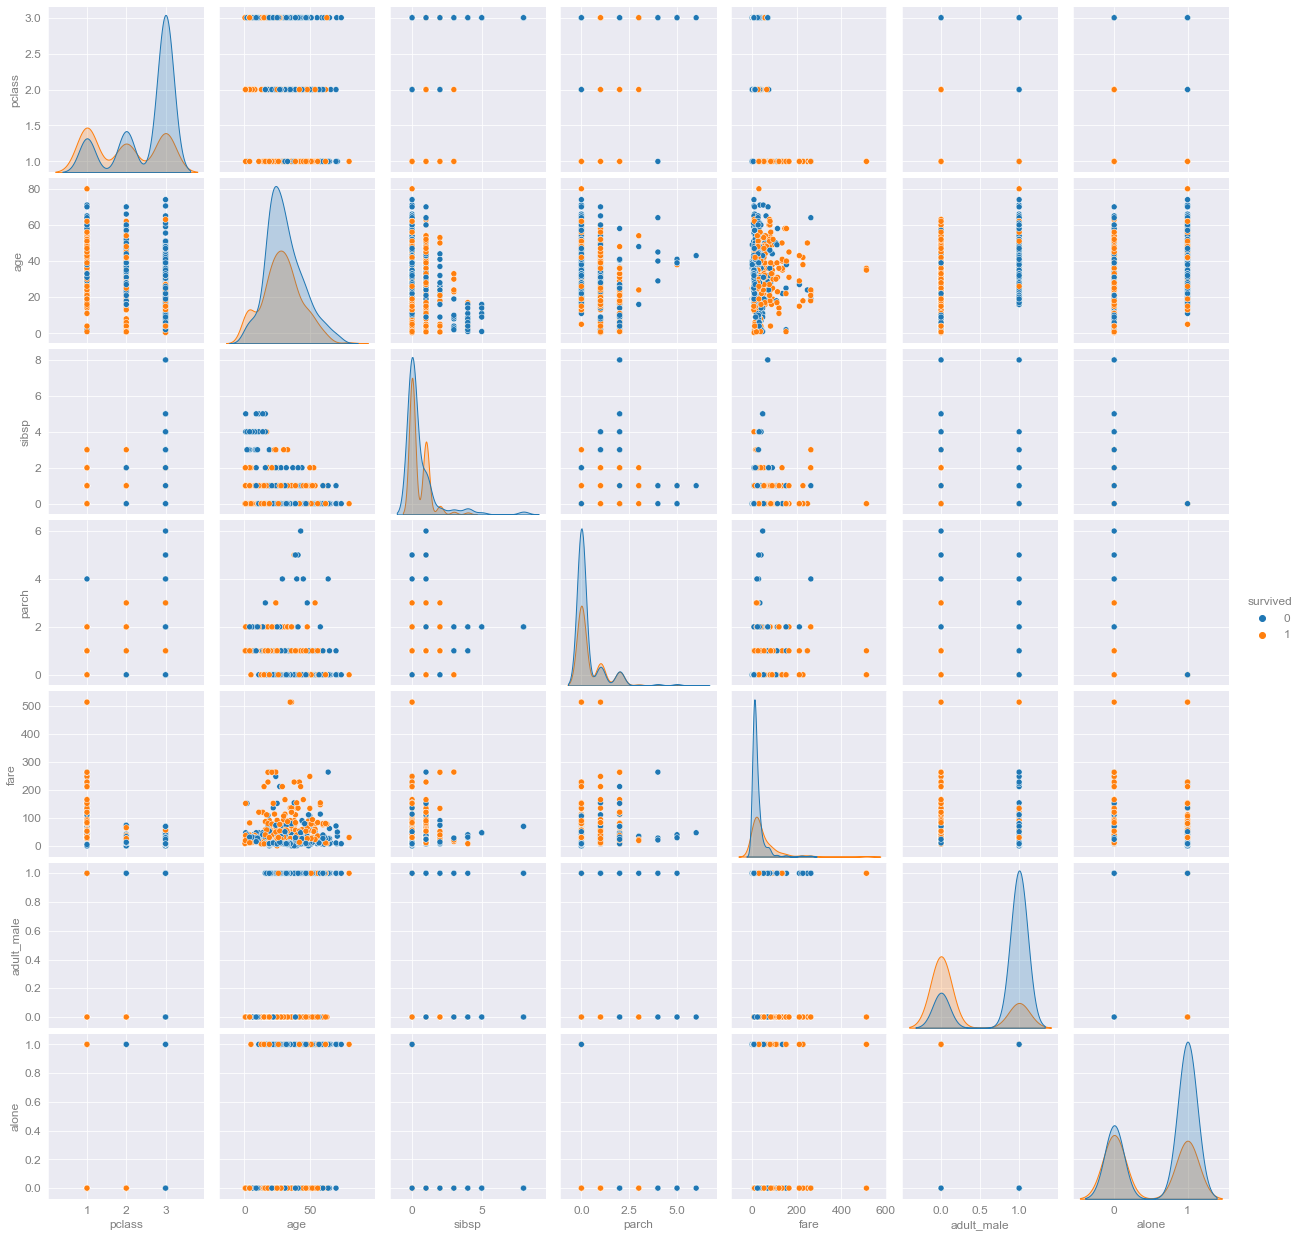

In [37]:
sns.pairplot(train_df, hue=target_col);

Skewness: 4.787317
Kurtosis: 33.398141


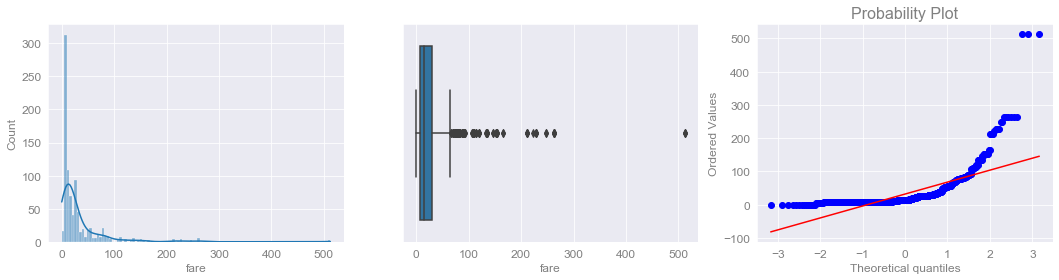

In [11]:
target_col = 'fare'

print("Skewness: %f" % train_df[target_col].skew())
print("Kurtosis: %f" % train_df[target_col].kurt())

f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
sns.histplot(data=train_df[target_col], kde=True, ax=ax[0])
sns.boxplot(x=train_df[target_col], ax=ax[1])
sc.stats.probplot(train_df[target_col], plot=ax[2])
plt.show()

# min-max values of y-target

In [5]:
#df_train[(df_train.target == df_train.target.min()) | (df_train.target == df_train.target.max())]

# Correlation map

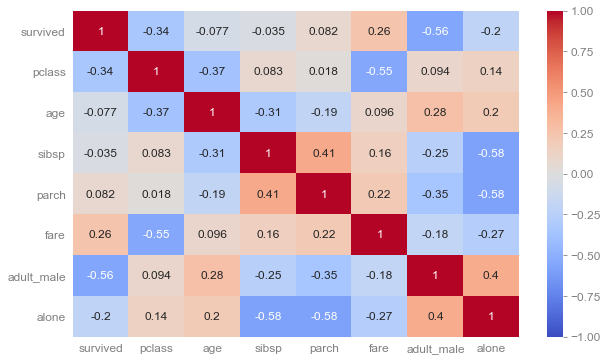

In [41]:
#plt.figure(figsize=(14,14))
sns.heatmap(train_df.corr(method='pearson'), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

# Boxplot by predictor

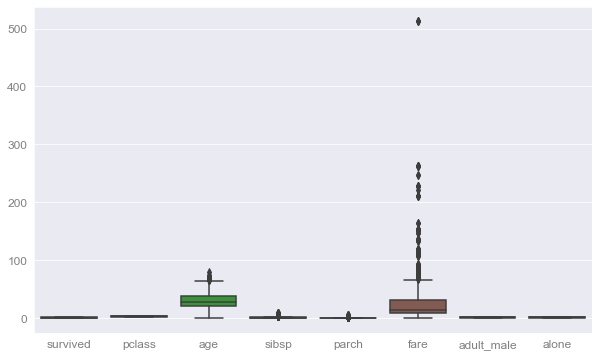

In [38]:
sns.boxplot(data=train_df);

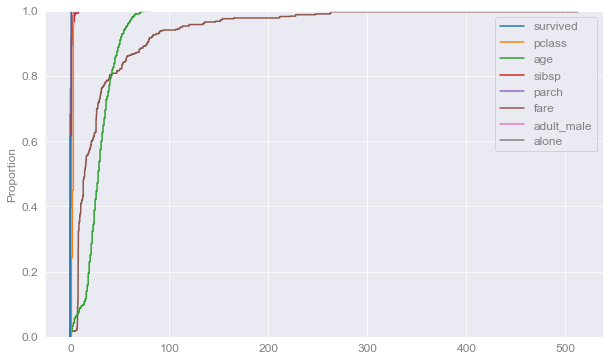

In [39]:
sns.ecdfplot(data=train_df, color='green');

ConversionError: Failed to convert value(s) to axis units: 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: x, Length: 891, dtype: object

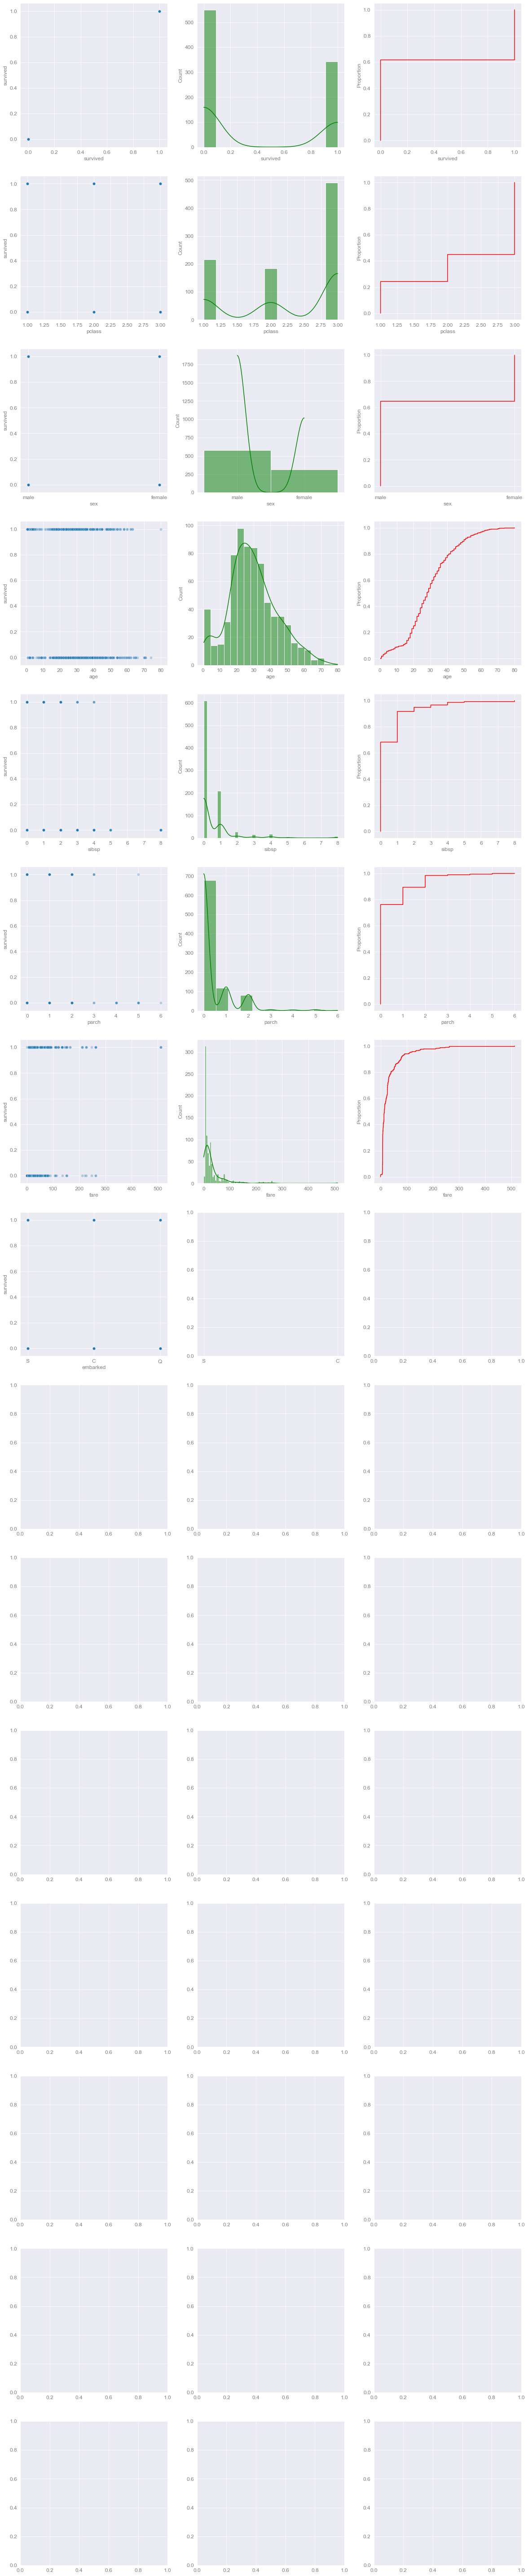

In [40]:
#col_list = df_train.loc[:,df_train.columns.str.contains('cont')].columns
col_list = train_df.columns #drop('id', axis=1).columns

fig = plt.figure(figsize=(20,7*len(col_list)))
axes = fig.subplots(len(col_list), 3)

for ax, x_col in zip(axes, col_list):
    sns.scatterplot(data=train_df, x=x_col, y=target_col, alpha=0.3, ax=ax[0])
    #start, end = ax.get_xlim()
    #ax.xaxis.set_ticks(np.arange(-0.2, 1, 0.05));
    sns.histplot(data=train_df, x=x_col, ax=ax[1], color='green', kde=True)
    sns.ecdfplot(data=train_df, x=x_col, ax=ax[2], color='red');